In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Load the dataset
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values of the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape((train_images.shape[0], 28*28))
test_images = test_images.reshape((test_images.shape[0], 28*28))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


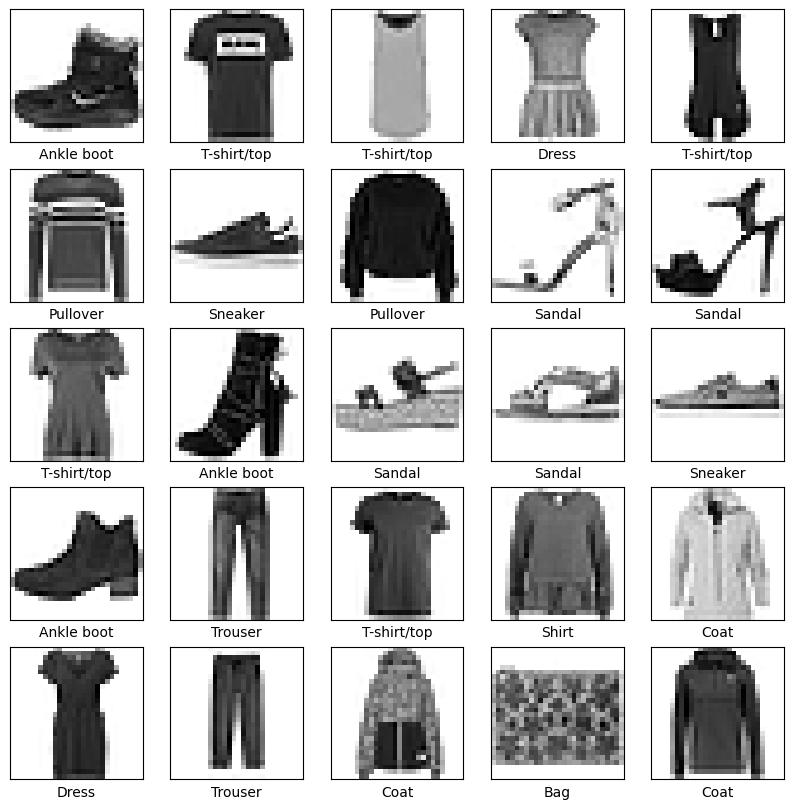

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plot a few images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [4]:
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)  # Fine-tune beta values

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce Learning Rate Callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Monitor the validation loss
    factor=0.2,           # Reduce the learning rate by multiplying it by this factor
    patience=3,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001,        # Minimum learning rate that the reduction process can reach
    verbose=1             # Provide updates when the callback makes a change in the learning rate
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
history = model.fit(train_images, train_labels, epochs=50,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.3960 - loss: 1.7626 - val_accuracy: 0.7782 - val_loss: 0.6142 - learning_rate: 1.0000e-04
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7116 - loss: 0.8310 - val_accuracy: 0.8186 - val_loss: 0.5063 - learning_rate: 1.0000e-04
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7679 - loss: 0.6770 - val_accuracy: 0.8402 - val_loss: 0.4543 - learning_rate: 1.0000e-04
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7902 - loss: 0.6132 - val_accuracy: 0.8497 - val_loss: 0.4169 - learning_rate: 1.0000e-04
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8052 - loss: 0.5775 - val_accuracy: 0.8577 - val_loss: 0.4038 - learning_rate: 1.0000e-04
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8204 - loss: 0.5309 - val_accuracy: 0.8602 - val_loss: 0.3913 - learning_rate: 1.0000e-04
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8825 - loss: 0.3411

Test accuracy: 0.8824999928474426


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.80      0.80      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.77      0.83      0.80      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.70      0.65      0.68      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



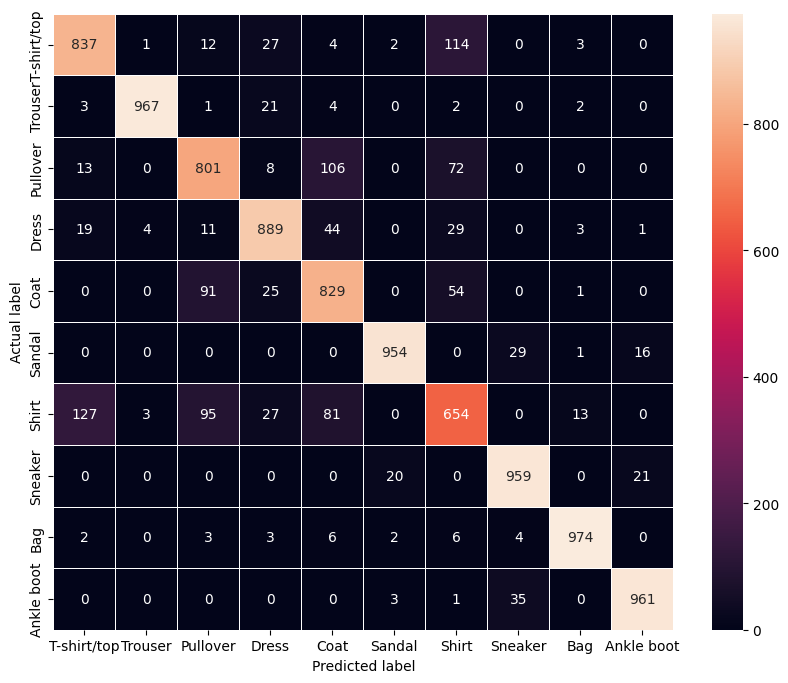

In [7]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print(classification_report(test_labels, predicted_classes, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

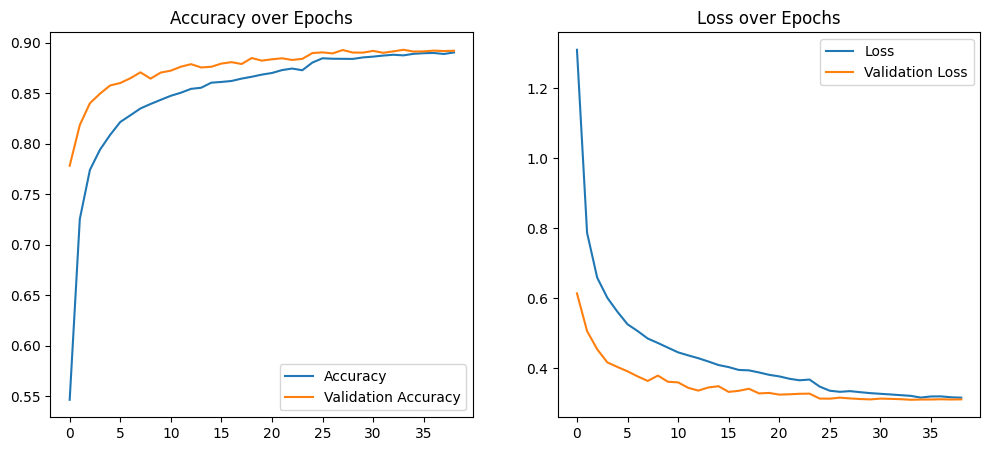

In [8]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()